# DAML4 notes
## Week 6 - Linear classification
<hr style="border:2px solid black"> </hr>
Given a training set of $N$ data point-target pairs $\{\mathbf{x}^{(n)}, y^{(n)}\}_{n=0}^{N-1}$ where $\mathbf{x}\in \mathbb{R}^{D}$ and $y\in \mathbb{Z}^+_{<K} = \{0,1,\ldots,K-1\}$ the goal in classification is to obtain a model that can predict the correct class (i.e. correct value of $y$) for each training point. Although, what we actually want is for the model to generalise to unseen test data!




## Linear classifiers for binary classification

In a binary classification problem, there are two possible labels. These are typically either denoted as $y\in \{0,1\}$ or $y\in \{-1,1\}$ depending on what is most mathematically convenient.

A linear model for binary classification looks the same as a linear model for regression:


$$f(\mathbf{x}) = \mathbf{w}^\top \phi(\mathbf{x}) + b$$

$\phi$ is a transformation that maps $\mathbf{x}$ to a feature vector $\phi({\mathbf{x}})\in\mathbb{R}^{Z}$ and $\mathbf{w}\in \mathbb{R}^{Z}$ is a vector of learnable weights. The learnable bias $b\in\mathbb{R}^1$ is written explicitly.

Once we have learnt the weights, $f(\mathbf{x})$ can be used to make class predictions using some threshold function such as $\hat{y}=\begin{cases}
          1 \quad &\text{if} \, f(\mathbf{x}) \geq0 \\
          0 \quad &\text{if} \, f(\mathbf{x})<0 \\
     \end{cases}$.


For pedagogical reasons, we will consider **untransformed data** this week, and write our linear classifiers as $f(\mathbf{x}) = \mathbf{w}^\top \mathbf{x} + b$ with $\mathbf{w}\in \mathbb{R}^{D}$.

### Perceptrons

A perceptron is a linear model for binary classification (aka a linear classifier) whose parameters (weights and biases) have been learnt through the perceptron algorithm.

Assuming that the labels are given by $y\in \{-1,1\}$, we will use the threshold function  $\hat{y}=\begin{cases}
          1 \quad &\text{if} \, f(\mathbf{x}) \geq0 \\
          -1 \quad &\text{if} \, f(\mathbf{x})<0 \\
     \end{cases}$

If $\hat{y}^{(n)}$ is our class prediction for some training point $\mathbf{x}^{(n)}$ then we want 

$$f(\mathbf{x}^{(n)}) = \mathbf{w}^\top \mathbf{x}^{(n)}+b\quad\text{s.t.} \quad\hat{y}^{(n)}=\begin{cases}
          1 \quad &\text{if} \, f(\mathbf{x}^{(n)}) \geq  0 \\
          -1 \quad &\text{if} \, f(\mathbf{x}^{(n)})<0 \\
     \end{cases}\forall n
$$

This can be achieved using the perceptron learning algorithm: we iterate through shuffled training data and if some point $\mathbf{x}^{(n)}$ is misclassified using the threshold function we update 

1. $\mathbf{w} \leftarrow \mathbf{w} + \alpha\,y^{(n)} \mathbf{x}^{(n)}$
2. $b \leftarrow b + \alpha\,y^{(n)} $


We will turn to sklearn to generate some synthetic data for binary classification:

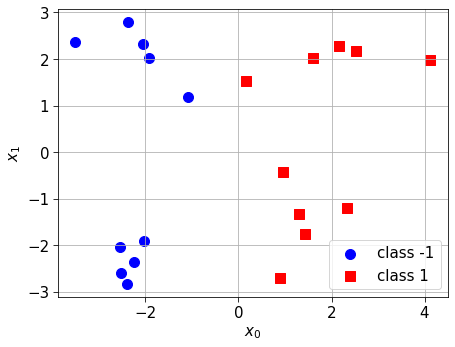

In [1]:
# Import numpy for arrays and matplotlib for plotting
import numpy as np
import matplotlib.pyplot as plt

# This makes matplotlib output nice figures without much tweaking
plt.rcParams.update(
    {
        "lines.markersize": 10,  # Big points
        "font.size": 15,  # Larger font
        "xtick.major.size": 5.0,  # Bigger xticks
        "ytick.major.size": 5.0,  # Bigger yticks
    }
)

# We can use sklearn to make synthetic data. Let's create two classes that are nicely separated.
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=20, n_features=2, random_state=0, n_redundant=0, class_sep=2
)

# Classes are 1 and 0 by default so I will change 0 to -1
y[y == 0] = -1

# We can produce a scatter plot of our data with colours corresponding to different classes
colours = ["b", "r"]
fig, ax = plt.subplots(figsize=[7, 7])
ax.set_aspect("equal", "box")
ax.scatter(X[y == -1, 0], X[y == -1, 1], color="b")
ax.scatter(X[y == 1, 0], X[y == 1, 1], color="r", marker="s")
ax.grid()
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
plt.legend(["class -1", "class 1"])

We will use sklearn's [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html) class to learn a linear model using the preceptron algorithm.

In [2]:
# Import perceptron class 
from sklearn.linear_model import Perceptron

# Create a model and fit
model = Perceptron(tol=1e-3, random_state=0)
model.fit(X, y)

print(f'The learnt model has weights {model.coef_} and bias {model.intercept_}')

The learnt model has weights  [[3.8418426  1.26750559]] and bias [0.]


We can now plot the decision boundary of the classifier alongside our data using some sklearn tools.

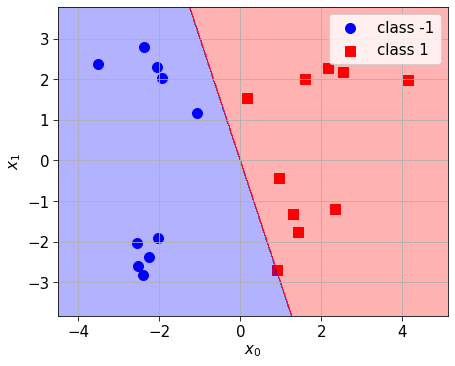

In [3]:
from sklearn.inspection import DecisionBoundaryDisplay
from matplotlib.colors import ListedColormap

# Produce the plot again
fig, ax = plt.subplots(figsize=[7, 7])
ax.set_aspect("equal", "box")
ax.scatter(X[y == -1, 0], X[y == -1, 1], color="b")
ax.scatter(X[y == 1, 0], X[y == 1, 1], color="r", marker="s")
ax.grid()
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
plt.legend(["class -1", "class 1"])

# Add the decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    alpha=0.3,
    grid_resolution=500,
    cmap=ListedColormap(colours),
    ax=ax,
)

This is a line, as we would expect. You can confirm this for yourself by writing out $f(\mathbf{x})=0$ and rearranging the equation.

### Logistic regression

For logistic regression we denote the two classes as $y\in \{0,1\}$ .

To perform logistic regression, we define our model output $f(\mathbf{x})$ as being the log-odds that some data point $\mathbf{x}$ is in class 1. This relates to the probability $p(y=1 | \mathbf{x})$ in that

$$f(\mathbf{x}) = \log\frac{p(y=1 | \mathbf{x})}{1-p(y=1 | \mathbf{x})}$$

We don't output probabilities directly, as $f(\mathbf{x})$ is unbounded, and can take all sorts of real values, whereas probabilities must be between 0 and 1.

Because we are now dealing with probabilities we can turn to statistics to derive a meaningful loss function. We show in the lecture that the model parameters that maximise the likelihood of our data are the same parameters that minimise the cross entropy loss 

$$L_{CE}=- \frac{1}{N}\sum_n y^{(n)} \log \sigma(\mathbf{w}^\top  \mathbf{x}^{(n)}+b)+({1-y^{(n)}})\log(1- \sigma( \mathbf{w}^\top \mathbf{x}^{(n)}+b))$$

where $\sigma (z) = \frac{1}{1+e^{-z}}$ is the sigmoid function.

The code for performing logistic regression is very similar to the above but we instead use the [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) class. Let's learn the weights and bias, print them out.

In [4]:
# Import logistic regresion class 
from sklearn.linear_model import LogisticRegression

# Create a model and fit. 
#This includes L2 regularisation by default (which is sensible!) which is controlled by C
# C is inverse to the strength of regularisation (C = 1/lambda) so lambda = 0 is equivalent to C=inf
model = LogisticRegression(random_state=0,C=np.inf)
model.fit(X, y)

print(f'The learnt model has weights  {model.coef_} and bias {model.intercept_}')

The learnt model has weights  [[15.59262959  2.09271393]] and bias [4.08109386]


Let's draw the decision boundary.

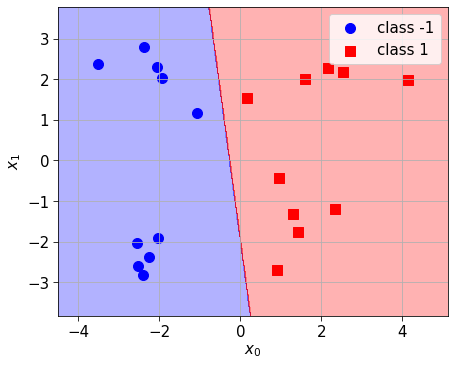

In [5]:
# Produce the plot again
fig, ax = plt.subplots(figsize=[7, 7])
ax.set_aspect("equal", "box")
ax.scatter(X[y == -1, 0], X[y == -1, 1], color="b")
ax.scatter(X[y == 1, 0], X[y == 1, 1], color="r", marker="s")
ax.grid()
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
plt.legend(["class -1", "class 1"])

# Add the decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    alpha=0.3,
    grid_resolution=500,
    cmap=ListedColormap(colours),
    ax=ax,
)

Given a test point e.g. $\begin{bmatrix}0&0\end{bmatrix}^\top$ we can use `model.predict_proba()` to get the probability breakdown:

In [6]:
model.predict_proba([[0, 0]])

array([[0.01660848, 0.98339152]])

This tells us that there is a low probability for class 0 (element 0) and a high probability for class 1 (element 1). These of course sum to 1!

We have considered binary classifiers in this note, but in the lab you will perform multi-way classification using multinomial logistic regression.

<hr style="border:2px solid black"> </hr>

#### Written by Elliot J. Crowley and &copy; The University of Edinburgh 2022-23